In [147]:
import pandas as pd

# Load the data
df = pd.read_csv('Meanavrage.csv')

df = df[df['AC_POWER'] != 0]
df.head()

#convert the date column to datetime
df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

In [148]:

from river import metrics
from river import time_series
import matplotlib.dates as mdates


# Initialize the model
model = time_series.HoltWinters(
    alpha=0.4,
    beta=0.05,
    gamma=0.2,
    seasonality=96,
    multiplicative=False,
)

# Initialize the metric
metric = metrics.MAE()

# Create a list to store the predictions
predictions = []

# Iterate over the rows of the DataFrame
for i, (_, row) in enumerate(df.iterrows()):
    y = row['AC_POWER']
    model.learn_one(y)

    # Predict the next point only after the model has been trained on 'seasonality' number of data points
    if i >= model.seasonality:
        prediction = model.forecast(horizon=24)[0]
        predictions.append(prediction)  # Store the prediction

        # Update the metric
        metric.update(y, prediction)

print(f"Final error: {metric.get()}")
print(f"Predictions: {predictions}")

Final error: 2101.055137051673
Predictions: [7843.1536960696385, 5075.297809225212, 3022.08209433389, 1508.4519549667732, 464.4635443649714, -63.71300669804293, -78.35897477518049, 320.10061749074384, 1074.0873656911465, 2515.5679409005306, 3796.3014783604103, 5919.247353160299, 7957.740293365505, 9326.959478431198, 10573.016138526329, 13062.19936437984, 14810.416614869298, 14800.994198587056, 16448.403528483886, 19254.223759530643, 20547.37839250853, 21214.421156887176, 22082.062016513362, 23710.898911191583, 24322.943698292558, 26069.916114295935, 26797.149786292357, 25898.439134156186, 22991.55242867889, 23297.147065003737, 21470.898041782646, 22214.511063240046, 18533.669945293183, 16723.854209009853, 18985.608556262105, 18837.288972126327, 19084.656005994326, 16442.937270924718, 13151.942966895238, 16096.230882789458, 17709.184932382435, 16823.840725433416, 16952.641706316997, 13683.118859620421, 13580.249150194208, 11996.669854262274, 10605.967874704638, 9284.104882423728, 6933.3

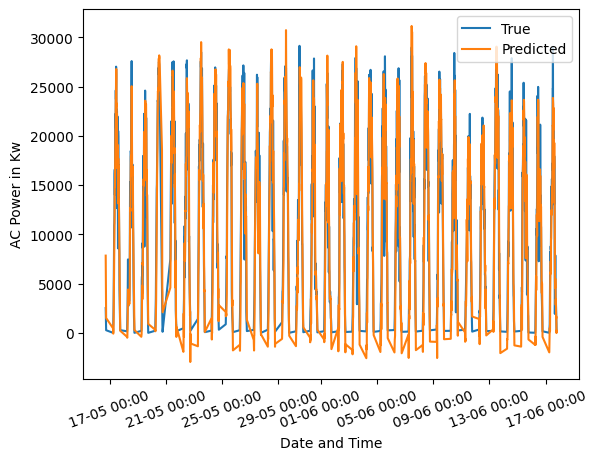

In [149]:
#plot the predictions
import matplotlib.pyplot as plt

#drop the first 'seasonality' number of points from the DataFrame
df = df.iloc[model.seasonality:]

plt.plot(df['DATE_TIME'],df['AC_POWER'].values, label='True')
plt.plot(df['DATE_TIME'],predictions, label='Predicted')
# Format the x-axis to display the date and time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))


plt.xlabel('Date and Time')
plt.ylabel('AC Power in Kw')


plt.xticks(rotation=20)  # rotate labels

plt.legend()
plt.show()


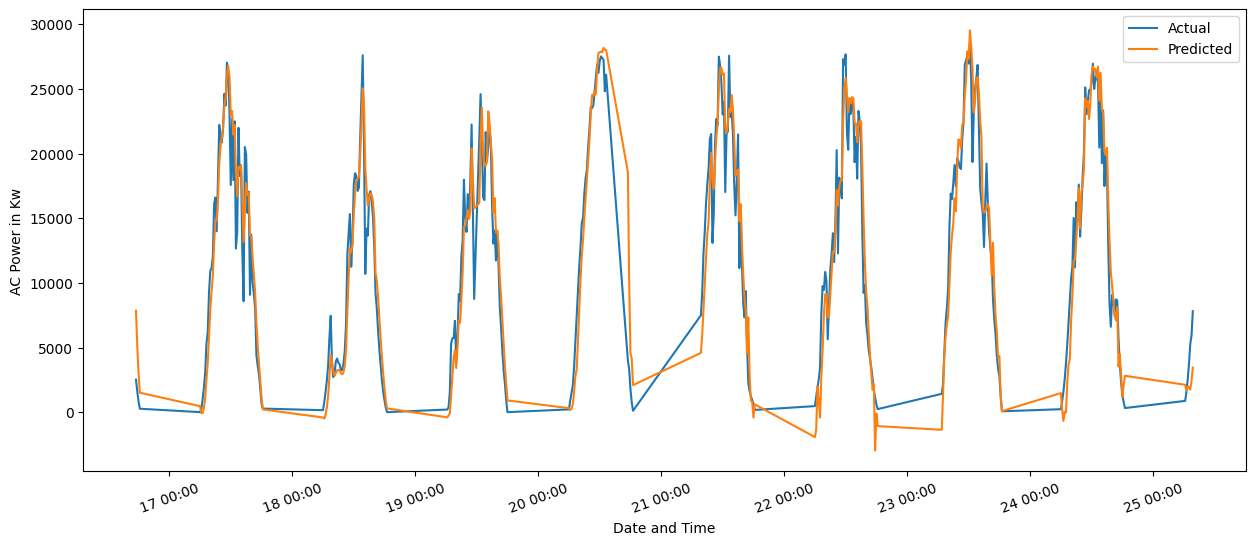

In [150]:
# Plot a few days
plt.plot(df['DATE_TIME'].values[:96*4], df['AC_POWER'].values[:96*4], label='Actual')
plt.plot(df['DATE_TIME'].values[:96*4], predictions[:96*4], label='Predicted')

# Format the x-axis to display the date and time
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))


plt.xlabel('Date and Time')
plt.ylabel('AC Power in Kw')

#increase the size of the plot
plt.gcf().set_size_inches(15, 6)


plt.xticks(rotation=20)  # rotate labels

plt.legend()
plt.show()